In [1]:
from koopman_probabilistic import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
enrgy_isone = np.expand_dims(np.array(all_data["ISONE CA"]["DEMAND"], dtype=np.float64), 1)

In [3]:
enrgy_isone = (enrgy_isone - np.median(enrgy_isone)) / (np.max(enrgy_isone) - np.min(enrgy_isone))

In [4]:
data_name = "GEFCom2017_isone"

predict_through = len(enrgy_isone) // 4
train_through = 1 * 365 * 24

num_mu = 4
num_sig = 4
num_fourier = 3
mu_file = "forecasts//" + data_name + f"_{num_mu}mu.npy"
sigma_file = "forecasts//" + data_name + f"_{num_sig}sigma.npy"

In [5]:
model = FullyConnectedNLL(x_dim=1, num_freqs_mu=num_mu, num_freqs_sigma=num_sig, n=512)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier)
xt = enrgy_isone[:train_through]
k.find_fourier_omegas(xt, hard_code=[24, 168, 365.24])

tensor([0.2618, 0.0374, 0.0172])

In [6]:
k.fit(xt, iterations=50, interval=10, verbose=True, cutoff=1, weight_decay=0.0001)
mu_hat, sigma_hat = k.predict(predict_through)
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)

Setting 3 to 2.0000761067587556
Setting 7 to 52559.74999999999
Iteration  0
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -0.25370975165226145
Iteration  1
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -0.25371099112426937
Iteration  2
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -0.25371570567329155
Iterati

Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -1.6442335393922183
Iteration  27
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -1.6448763600232266
Iteration  28
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04], grad_fn=<MulBackward0>)
Loss:  -1.6454219819083584
Iteration  29
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 5.2560e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e

<IPython.core.display.Javascript object>


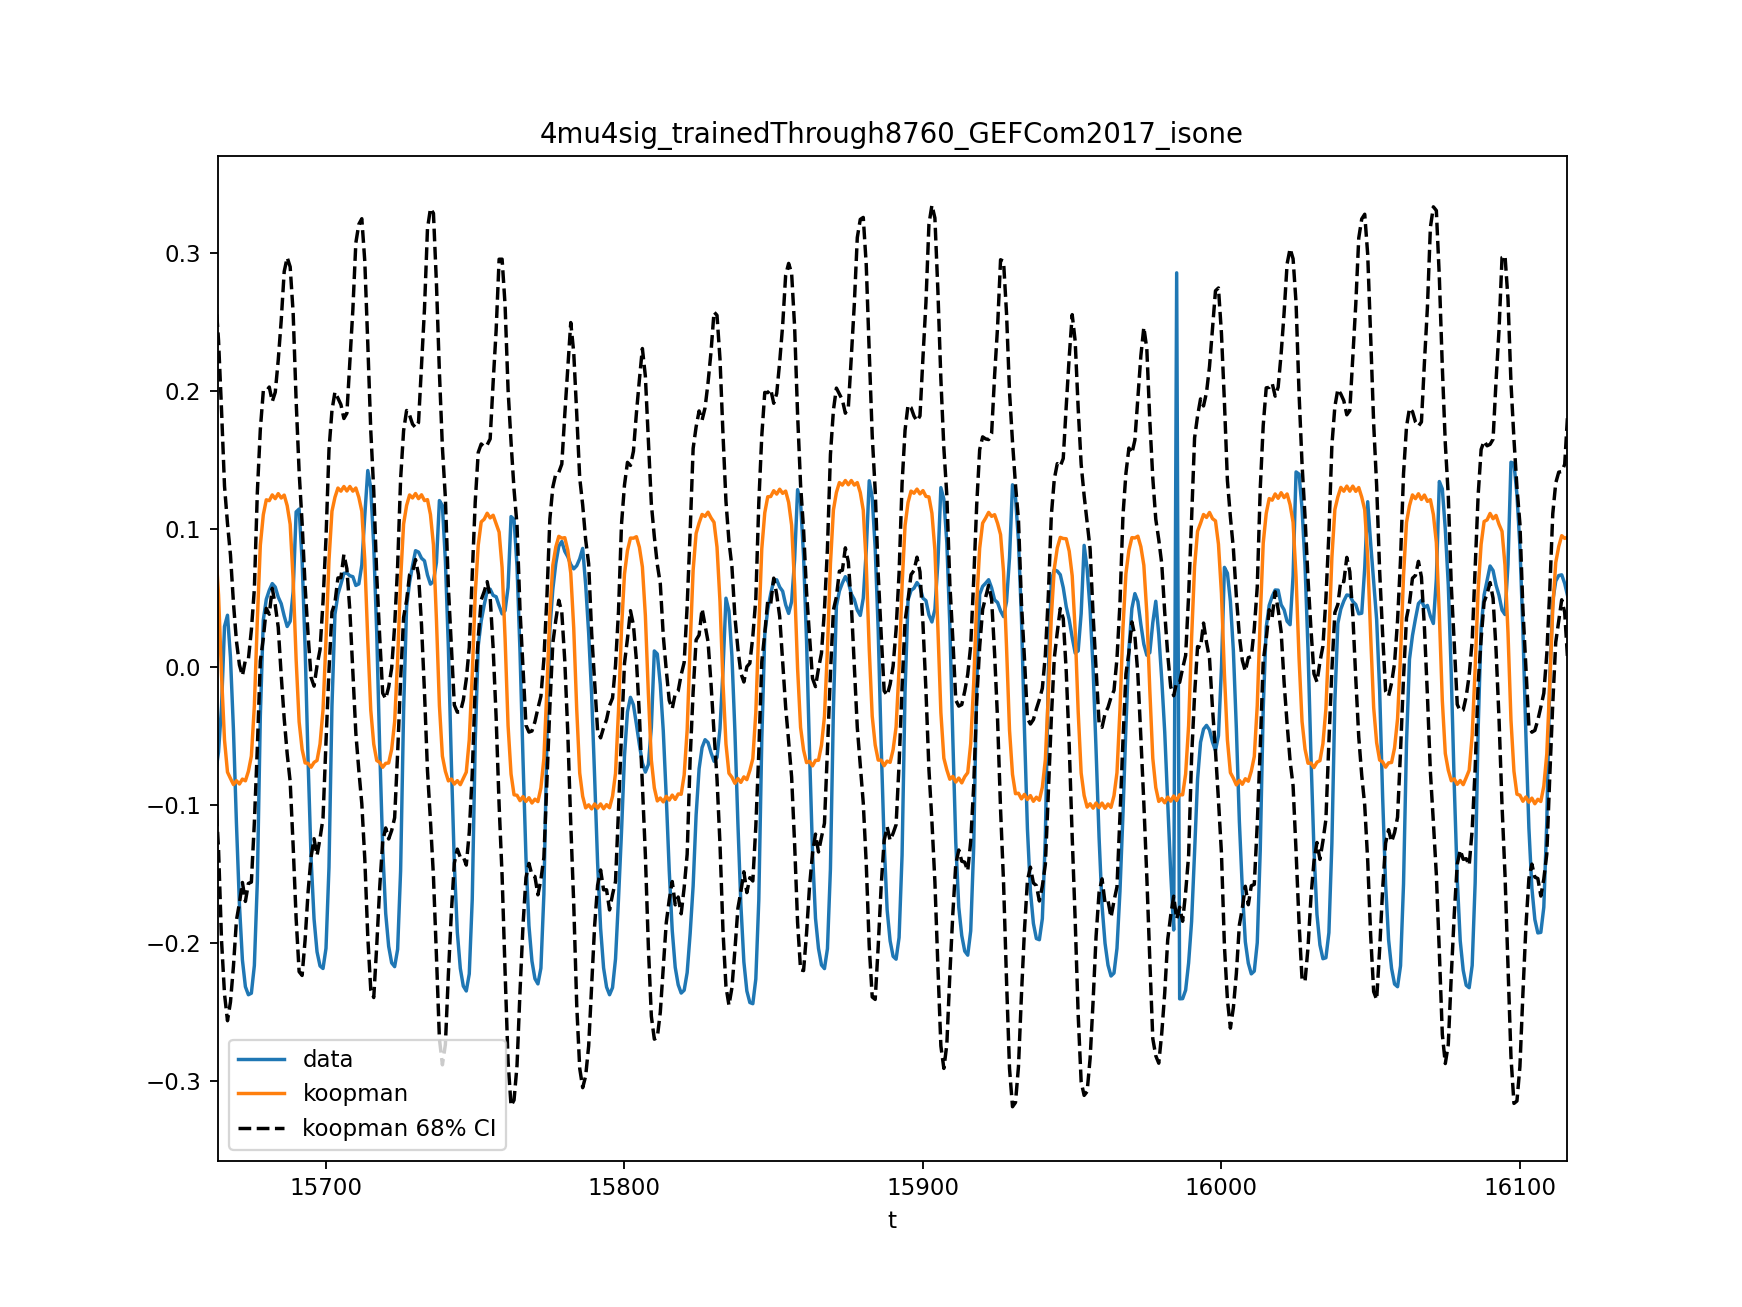

In [7]:
# print("SEED:", seed)
%matplotlib notebook
# slc = -2400
# plt.scatter(np.arange(-slc), x[slc:], label="data")
plt.plot(enrgy_isone[:predict_through], label="data")
plt.plot(mu_hat, label="koopman")
plt.plot(mu_hat + sigma_hat, "--", color="black", label="koopman 68% CI")
plt.plot(mu_hat - sigma_hat, "--", color="black")

# plt.plot(mu_vec[slc:], label="real mu")
# plt.plot(mu_hat[slc:, 0], label="koopman mu")
# plt.legend()
# plt.show()
#
# plt.plot(sigma_vec[slc:], label="real sigma")
# plt.plot(sigma_hat, label="koopman sigma")
plt.title(f"{num_mu}mu{num_sig}sig_trainedThrough{train_through}_" + data_name)
plt.xlabel("t")
plt.legend()
plt.show()

[[-0.14968731]
 [-0.0846278 ]
 [-0.01623966]
 [ 0.03419407]
 [ 0.05789792]
 [ 0.06314303]
 [ 0.05401452]
 [ 0.03863224]
 [ 0.02390559]
 [ 0.01507969]
 [ 0.01977002]
 [ 0.03676619]
 [ 0.06097438]
 [ 0.04644947]
 [ 0.01366754]
 [-0.02864636]
 [-0.08487997]
 [-0.14232399]
 [-0.1864535 ]
 [-0.20017147]]


In [ ]:
plt.figure()
plt.plot(mu_vec, label="real $\mu$")
plt.plot(mu_hat[:, 0], "--", label="koopman $\mu$")
plt.xlabel("t")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


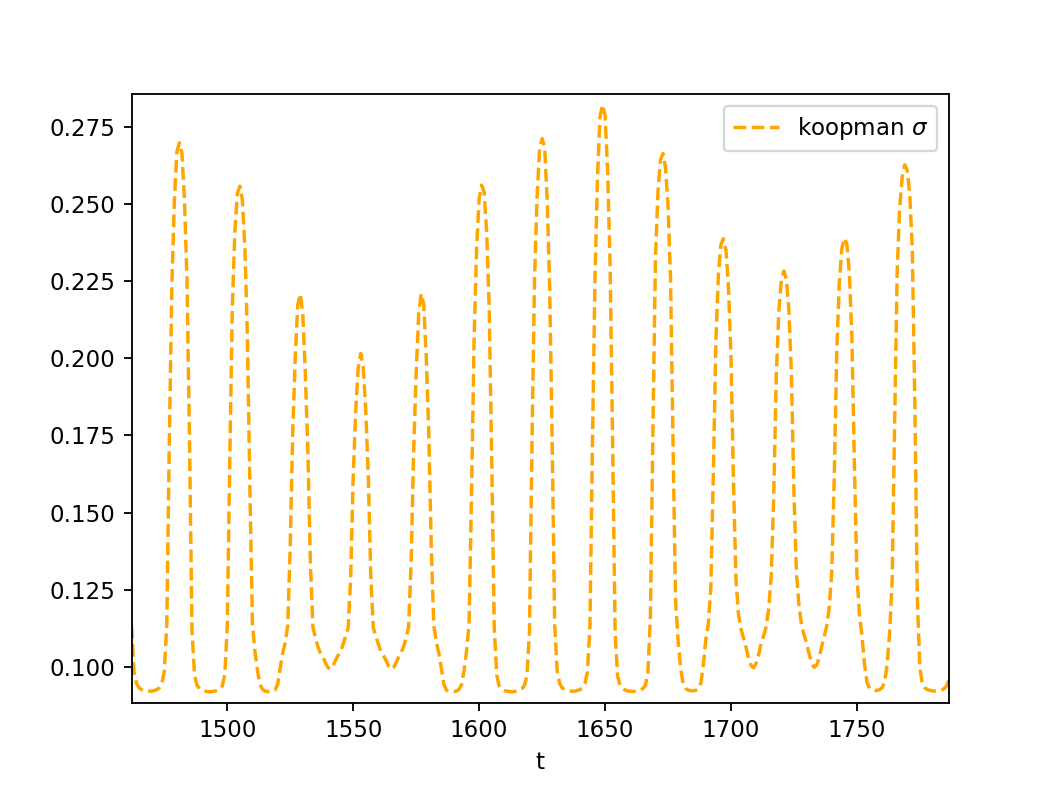

In [13]:
plt.figure()
# plt.plot(sigma_vec, color="blue", label="real $\sigma$")
plt.plot(sigma_hat[:, 0], "--", color="orange", label="koopman $\sigma$")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# Construct pdf quantiles
# REMOVE
sigma = 1 * np.cos(2 * np.pi / 36 * np.arange(5000) + 1.5) + 4

num_quantiles = 100
domain = [min(mu_hat[:,0] - 2.5*sigma), max(mu_hat[:,0] + 2.5*sigma)]
x_axis = np.linspace(domain[0], domain[1], num_quantiles)

In [ ]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
verts = []
ts = range(4970, 5000, 2)
for t in ts:
    z = normal_pdf(mu_hat[t], sigma[t], x_axis)
    plt.plot(x_axis, t*np.ones(num_quantiles), z)
    verts.append(polygon_under_graph(x_axis, z))

plt.plot(mu_hat[4970:5000:2, 0], ts, np.zeros(len(ts)))

# poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
# ax.add_collection3d(poly, zs=ts, zdir='y')
plt.xlabel("x")
plt.ylabel("t")
ax.set_zlabel("probability density")


plt.show()

In [50]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    _data = json.loads(f.read())

In [42]:
_data[zone]["Date"][0][5:10]

'01-01'

In [46]:
for zone in _data:
    for i, date in enumerate(_data[zone]["Date"]):
        if _data[zone]["DEMAND"][i] == 0:
            print(date, i)
            _data[zone]["DEMAND"][i] = (_data[zone]["DEMAND"][i - 1] + _data[zone]["DEMAND"][i + 1]) / 2



2005-04-03 00:00:00 2209
2006-04-02 00:00:00 10945
2007-03-11 00:00:00 19177
2008-03-09 00:00:00 27913
2009-03-08 00:00:00 36649
2010-03-14 00:00:00 45553
2011-03-13 00:00:00 54289
2012-03-11 00:00:00 63025
2013-03-10 00:00:00 71761
2014-03-09 00:00:00 80497
2015-03-08 00:00:00 89233
2005-04-03 00:00:00 2209
2006-04-02 00:00:00 10945
2007-03-11 00:00:00 19177
2008-03-09 00:00:00 27913
2009-03-08 00:00:00 36649
2010-03-14 00:00:00 45553
2011-03-13 00:00:00 54289
2012-03-11 00:00:00 63025
2013-03-10 00:00:00 71761
2014-03-09 00:00:00 80497
2015-03-08 00:00:00 89233
2005-04-03 00:00:00 2209
2006-04-02 00:00:00 10945
2007-03-11 00:00:00 19177
2008-03-09 00:00:00 27913
2009-03-08 00:00:00 36649
2010-03-14 00:00:00 45553
2011-03-13 00:00:00 54289
2012-03-11 00:00:00 63025
2013-03-10 00:00:00 71761
2014-03-09 00:00:00 80497
2015-03-08 00:00:00 89233
2005-04-03 00:00:00 2209
2006-04-02 00:00:00 10945
2007-03-11 00:00:00 19177
2008-03-09 00:00:00 27913
2009-03-08 00:00:00 36649
2010-03-14 00:00

In [49]:
with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json", "w") as f:
    f.write(json.dumps(_data))

<IPython.core.display.Javascript object>


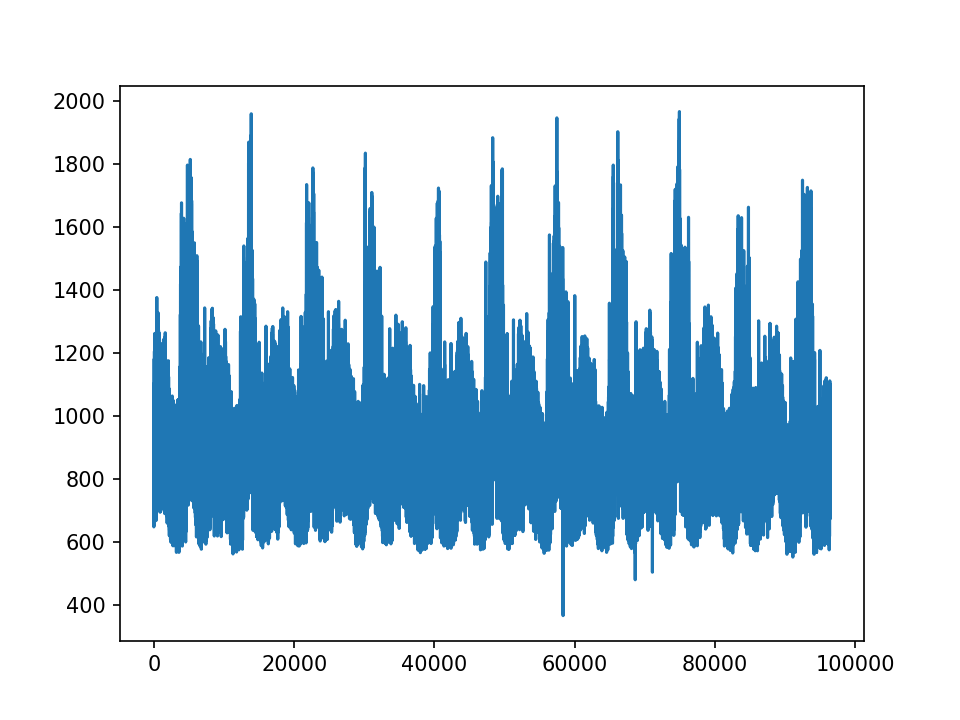

In [51]:
plt.figure()
plt.plot(_data["RI"]["DEMAND"])
plt.show()